In [81]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [82]:
data_frame = pd.read_csv("T40.4_Race.txt",delimiter="\t")

We replace "Unreliable" by NaN.

In [83]:
data_frame=data_frame.replace("Unreliable",np.nan)

In [84]:
CF2b = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")&
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2b = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")&
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFb = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMb = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2b_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2b_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)


CF2w = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")&
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2w = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")&
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFw = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMw = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2w_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2w_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)


CF2a = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Asian or Pacific Islander")& 
           (data_frame["Notes"] != "Total") &
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2a = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Asian or Pacific Islander")& 
           (data_frame["Notes"] != "Total") &
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFa = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Asian or Pacific Islander")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMa = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Asian or Pacific Islander")& 
           (data_frame["Notes"] != "Total") & (data_frame["Crude Rate"] != "NaN")][["Year", "Crude Rate"]].astype(float)
CF2a_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Asian or Pacific Islander")& 
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2a_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Asian or Pacific Islander")& 
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

CFa  = CFa.dropna()
CF2a= CF2a.dropna()
CMa  = CMa.dropna()
CM2a= CM2a.dropna()

In [85]:
x1b=CF2b["Year"]
x1cb=CFb["Year"]
y1b=CF2b["Crude Rate"]

x2b=CM2b["Year"]
x2cb=CMb["Year"]
y2b=CM2b["Crude Rate"]

x1w=CF2w["Year"]
x1cw=CFw["Year"]
y1w=CF2w["Crude Rate"]

x2w=CM2w["Year"]
x2cw=CMw["Year"]
y2w=CM2w["Crude Rate"]

x1a=CF2a["Year"]
x1ca=CFa["Year"]
y1a=CF2a["Crude Rate"]

x2a=CM2a["Year"]
x2ca=CMa["Year"]
y2a=CM2a["Crude Rate"]

In [86]:
xrb=CM2b["Year"]
yrb=CM2b["Crude Rate"].div(CF2b["Crude Rate"].values)

xrw=CM2w["Year"]
yrw=CM2w["Crude Rate"].div(CF2w["Crude Rate"].values)

above_2016M = CM2a[CM2a["Year"] >= 2016]
above_2016F = CF2a[CF2a["Year"] >= 2016]
xr2a=above_2016M["Year"]
yr2a=above_2016M["Crude Rate"].div(above_2016F["Crude Rate"].values)
xra=CMa[CMa["Year"] >= 2016]["Year"]

In [87]:
coeffFb = np.polyfit(x1b, y1b, 2)
yfitFb = np.polyval(coeffFb,x1b)
resFb = np.sum((y1b  - yfitFb)**2)
coeffMb = np.polyfit(x2b, y2b, 2)
yfitMb = np.polyval(coeffMb,x2b)
resMb = np.sum((y2b  - yfitMb)**2)

stdFb = np.sqrt(resFb/5)
stdMb = np.sqrt(resMb/5)

In [88]:
coeffFw = np.polyfit(x1w, y1w, 2)
yfitFw = np.polyval(coeffFw,x1w)
resFw = np.sum((y1w  - yfitFw)**2)
coeffMw = np.polyfit(x2w, y2w, 2)
yfitMw = np.polyval(coeffMw,x2w)
resMw = np.sum((y2w  - yfitMw)**2)

stdFw = np.sqrt(resFw/5)
stdMw = np.sqrt(resMw/5)

In [89]:
coeffFa = np.polyfit(x1a, y1a, 2)
yfitFa = np.polyval(coeffFa,x1a)
resFa = np.sum((y1a  - yfitFa)**2)
coeffMa = np.polyfit(x2a, y2a, 2)
yfitMa = np.polyval(coeffMa,x2a)
resMa = np.sum((y2a  - yfitMa)**2)

stdFa = np.sqrt(resFa/2)
stdMa = np.sqrt(resMa/4)

percent off female =  25    23.076923
Name: Crude Rate, dtype: float64
percent off male =  62    28.794179
Name: Crude Rate, dtype: float64


Text(0.5, 0.98, 'T40.4 Black')

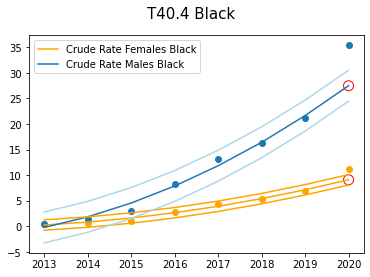

In [90]:
plt.plot(x1cb, np.polyval(coeffFb,x1cb), color='orange')
plt.scatter(x1b,y1b, color='orange')
plt.scatter(2020.0, CF2b_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffFb,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(x1cb, np.polyval(coeffMb,x1cb), color='tab:blue')
plt.scatter(x2b,y2b, color='tab:blue')
plt.legend(["Crude Rate Females Black", "Crude Rate Males Black"])
plt.scatter(2020.0, CM2b_covid["Crude Rate"],color='tab:blue')
plt.scatter(2020.0, np.polyval(coeffMb,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(x2cb, np.polyval(coeffFb,x1cb)+3*stdFb, color='orange')
plt.plot(x2cb, np.polyval(coeffFb,x1cb)-3*stdFb, color='orange')
plt.plot(x2cb, np.polyval(coeffMb,x1cb)+3*stdMb, color='lightblue')
plt.plot(x2cb, np.polyval(coeffMb,x1cb)-3*stdMb, color='lightblue')

print('percent off female = ',(CF2b_covid["Crude Rate"]/np.polyval(coeffFb,2020)-1)*100)
print('percent off male = ',(CM2b_covid["Crude Rate"]/np.polyval(coeffMb,2020)-1)*100)
plt.suptitle('T40.4 Black', fontsize=15)

percent off female =  34    22.990654
Name: Crude Rate, dtype: float64
percent off male =  71    28.828181
Name: Crude Rate, dtype: float64


Text(0.5, 0.98, 'T40.4 White')

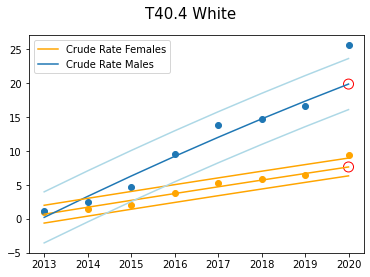

In [91]:
plt.plot(x1cw, np.polyval(coeffFw,x1cw), color='orange')
plt.scatter(x1w,y1w, color='orange')
plt.scatter(2020.0, CF2w_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffFw,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(x1cw, np.polyval(coeffMw,x1cw), color='tab:blue')
plt.scatter(x2w,y2w, color='tab:blue')
plt.legend(["Crude Rate Females", "Crude Rate Males"])
plt.scatter(2020.0, CM2w_covid["Crude Rate"],color='tab:blue')
plt.scatter(2020.0, np.polyval(coeffMw,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(x2cw, np.polyval(coeffFw,x1cw)+3*stdFw, color='orange')
plt.plot(x2cw, np.polyval(coeffFw,x1cw)-3*stdFw, color='orange')
plt.plot(x2cw, np.polyval(coeffMw,x1cw)+3*stdMw, color='lightblue')
plt.plot(x2cw, np.polyval(coeffMw,x1cw)-3*stdMw, color='lightblue')

print('percent off female = ',(CF2w_covid["Crude Rate"]/np.polyval(coeffFw,2020)-1)*100)
print('percent off male = ',(CM2w_covid["Crude Rate"]/np.polyval(coeffMw,2020)-1)*100)
plt.suptitle('T40.4 White', fontsize=15)

percent off female =  16    81.818182
Name: Crude Rate, dtype: float64
percent off male =  53    74.418605
Name: Crude Rate, dtype: float64


Text(0.5, 0.98, 'T40.4 Asian')

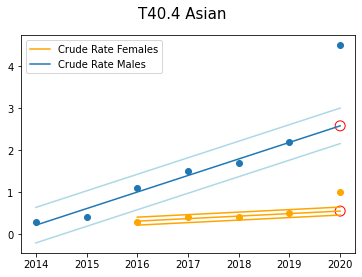

In [92]:
plt.plot(x1ca, np.polyval(coeffFa,x1ca), color='orange')
plt.scatter(x1a,y1a, color='orange')
plt.scatter(2020.0, CF2a_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffFa,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(x2ca, np.polyval(coeffMa,x2ca), color='tab:blue')
plt.scatter(x2a,y2a, color='tab:blue')
plt.legend(["Crude Rate Females", "Crude Rate Males"])
plt.scatter(2020.0, CM2a_covid["Crude Rate"],color='tab:blue')
plt.scatter(2020.0, np.polyval(coeffMa,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(xra, np.polyval(coeffFa,xra)+3*stdFa, color='orange')
plt.plot(xra, np.polyval(coeffFa,xra)-3*stdFa, color='orange')
plt.plot(x2ca, np.polyval(coeffMa,x2ca)+3*stdMa, color='lightblue')
plt.plot(x2ca, np.polyval(coeffMa,x2ca)-3*stdMa, color='lightblue')

print('percent off female = ',(CF2a_covid["Crude Rate"]/np.polyval(coeffFa,2020)-1)*100)
print('percent off male = ',(CM2a_covid["Crude Rate"]/np.polyval(coeffMa,2020)-1)*100)
plt.suptitle('T40.4 Asian', fontsize=15)

percent off male black =  62    28.794179
Name: Crude Rate, dtype: float64
percent off male white=  71    28.828181
Name: Crude Rate, dtype: float64
percent off male asian =  53    74.418605
Name: Crude Rate, dtype: float64


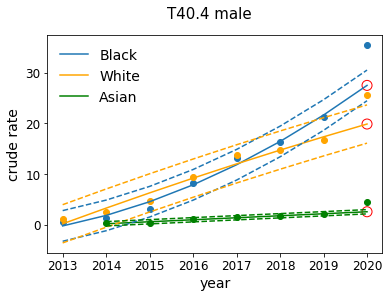

In [93]:
plt.plot(x2cb, np.polyval(coeffMb,x2cb), color='tab:blue')
plt.scatter(x2b,y2b, color='tab:blue')
plt.scatter(2020.0, CM2b_covid["Crude Rate"], color='tab:blue')
plt.scatter(2020.0, np.polyval(coeffMb,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(x2cw, np.polyval(coeffMw,x2cw), color='orange')
plt.scatter(x2w,y2w, color='orange')
plt.scatter(2020.0, CM2w_covid["Crude Rate"],color='orange')
plt.scatter(2020.0, np.polyval(coeffMw,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(x2ca, np.polyval(coeffMa,x2ca), color='green')
plt.scatter(x2a,y2a, color='green')
plt.scatter(2020.0, CM2a_covid["Crude Rate"],color='green')
plt.scatter(2020.0, np.polyval(coeffMa,2020), s=100, edgecolors='red', facecolors='none')

plt.plot(x2cb, np.polyval(coeffMb,x2cb)+3*stdMb, color='tab:blue', linestyle='dashed')
plt.plot(x2cb, np.polyval(coeffMb,x2cb)-3*stdMb, color='tab:blue', linestyle='dashed')
plt.plot(x2cw, np.polyval(coeffMw,x2cw)+3*stdMw, color='orange', linestyle='dashed')
plt.plot(x2cw, np.polyval(coeffMw,x2cw)-3*stdMw, color='orange', linestyle='dashed')
plt.plot(x2ca, np.polyval(coeffMa,x2ca)+3*stdMa, color='green', linestyle='dashed')
plt.plot(x2ca, np.polyval(coeffMa,x2ca)-3*stdMa, color='green', linestyle='dashed')


print('percent off male black = ',(CM2b_covid["Crude Rate"]/np.polyval(coeffMb,2020)-1)*100)
print('percent off male white= ',(CM2w_covid["Crude Rate"]/np.polyval(coeffMw,2020)-1)*100)
print('percent off male asian = ',(CM2a_covid["Crude Rate"]/np.polyval(coeffMa,2020)-1)*100)

plt.suptitle('T40.4 male', fontsize=15)
plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.legend(["Black", "White", "Asian"], frameon=False, fontsize=14)
plt.yticks(np.arange(min(y2w)-1.2, max(y2b)+15, 10.0))
plt.savefig('T40.4_Male.svg')

percent off female black =  25    23.076923
Name: Crude Rate, dtype: float64
percent off female white =  34    22.990654
Name: Crude Rate, dtype: float64
percent off female asian =  16    81.818182
Name: Crude Rate, dtype: float64


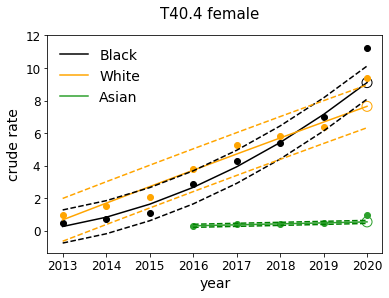

In [94]:
plt.plot(x1cb, np.polyval(coeffFb,x1cb), color='black')
plt.scatter(x1b,y1b, color='black')
plt.scatter(2020.0, CF2b_covid["Crude Rate"], color='black')
plt.scatter(2020.0, np.polyval(coeffFb,2020), s=100, edgecolors='black', facecolors='none')

plt.plot(x1cw, np.polyval(coeffFw,x1cw), color='orange')
plt.scatter(x1w,y1w, color='orange')
plt.scatter(2020.0, CF2w_covid["Crude Rate"],color='orange')
plt.scatter(2020.0, np.polyval(coeffFw,2020), s=100, edgecolors='orange', facecolors='none')

plt.plot(xra, np.polyval(coeffFa,xra), color='tab:green')
plt.scatter(xr2a, above_2016F['Crude Rate'], color='tab:green')
plt.scatter(2020.0, CF2a_covid["Crude Rate"],color='tab:green')
plt.scatter(2020.0, np.polyval(coeffFa,2020), s=100, edgecolors='tab:green', facecolors='none')

plt.legend(["Black", "White", "Asian"])

plt.plot(x1cb, np.polyval(coeffFb,x2cb)+3*stdFb, color='black', linestyle='dashed')
plt.plot(x1cb, np.polyval(coeffFb,x2cb)-3*stdFb, color='black', linestyle='dashed')
plt.plot(x1cw, np.polyval(coeffFw,x2cw)+3*stdFw, color='orange', linestyle='dashed')
plt.plot(x1cw, np.polyval(coeffFw,x2cw)-3*stdFw, color='orange', linestyle='dashed')
plt.plot(xra, np.polyval(coeffFa,xra)+3*stdFa, color='green', linestyle='dashed')
plt.plot(xra, np.polyval(coeffFa,xra)-3*stdFa, color='green', linestyle='dashed')

print('percent off female black = ',(CF2b_covid["Crude Rate"]/np.polyval(coeffFb,2020)-1)*100)
print('percent off female white = ',(CF2w_covid["Crude Rate"]/np.polyval(coeffFw,2020)-1)*100)
print('percent off female asian = ',(CF2a_covid["Crude Rate"]/np.polyval(coeffFa,2020)-1)*100)

plt.suptitle('T40.4 female', fontsize=15)
plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(np.arange(min(y1w)-1, max(y1b)+6.2, 2.0))
plt.legend(["Black", "White", "Asian"], frameon=False, fontsize=14)
plt.savefig('T40.4_Female.svg')

